# SciPy

## Processamento de Imagens

In [1]:
import scipy
scipy.__version__

'1.6.2'

In [2]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [4]:
# Função imread foi descontinuada no SciPy
#from scipy import misc
#misc.imread('Matplotlip-Mapa.png')

#Usamos agora a função do pacote imageio
from imageio import imread
imread('ml_map.png')

#Matplotlib tem uma função similar
import matplotlib.pyplot as plt
plt.imread('ml_map.png')

array([[[0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        ...,
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059]],

       [[0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        ...,
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059]],

       [[0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        ...,
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059]],

       ...,

       [[0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        ...,
        [0.9607843, 0.9647

## integração numerica

In [5]:
import numpy as np
np.__version__

'1.21.3'

In [6]:
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [7]:
#Integração
val, abserr = quad(lambda x: exp(-x**2), Inf, Inf)
val, abserr

(0.0, 0.0)

In [8]:
from scipy.integrate import odeint, ode

In [9]:
from pylab import *
%matplotlib inline

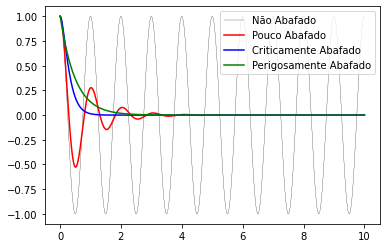

In [10]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x
    
    return [dx, dp]

y0 = [1.0, 0.0]

t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

y1 = odeint(dy, y0, t, args=(0.0,w0))
y2 = odeint(dy, y0, t, args=(0.2,w0))
y3 = odeint(dy, y0, t, args=(1.0,w0))
y4 = odeint(dy, y0, t, args=(5.0,20))

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="Não Abafado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Pouco Abafado")
ax.plot(t, y3[:,0], 'b', label="Criticamente Abafado")
ax.plot(t, y4[:,0], 'g', label="Perigosamente Abafado")
ax.legend();

## Fourier Transformation

In [12]:
from scipy.fftpack import *

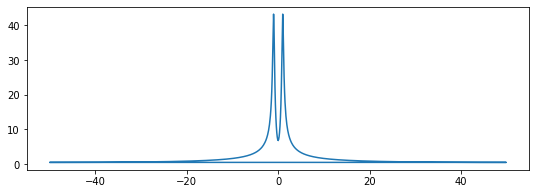

In [13]:
#Fourier transformation
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0])

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

## Álgebra Linear

In [14]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2,4,-1])

In [15]:
#Resolvendo um sistema de equações lineares
x = solve(A, b)
x

array([ 2., -2.,  9.])

In [16]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.67130352+0.j        , -0.13166088+0.08173646j,
       -0.13166088-0.08173646j])

In [17]:
evecs

array([[ 0.61561461+0.j        , -0.29313456+0.22114528j,
        -0.29313456-0.22114528j],
       [ 0.25431232+0.j        ,  0.88964373+0.j        ,
         0.88964373-0.j        ],
       [ 0.74588464+0.j        , -0.21277429-0.16860615j,
        -0.21277429+0.16860615j]])

In [18]:
svd(A)

(array([[-0.62139302,  0.47784103, -0.6209176 ],
        [-0.23704851, -0.87001101, -0.43230642],
        [-0.74677889, -0.1214446 ,  0.65389028]]),
 array([1.6868708 , 0.32995638, 0.07211198]),
 array([[-0.5424711 , -0.36992519, -0.75424165],
        [-0.8395431 ,  0.20679651,  0.50239685],
        [-0.02987471,  0.90575414, -0.42274927]]))

## Otimização

In [19]:
from scipy import optimize

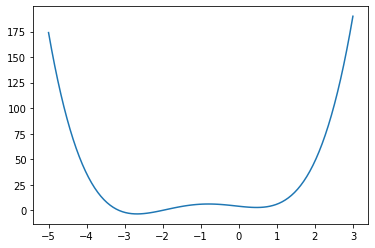

In [20]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [21]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


array([0.46961743])

## Estatística

In [22]:
from scipy import stats

(array([ 3.,  1.,  5.,  4.,  5.,  3.,  7.,  5., 12., 17., 16., 14., 28.,
        28., 42., 31., 38., 49., 49., 59., 61., 55., 58., 51., 54., 52.,
        36., 32., 32., 35., 22., 15., 16., 17.,  7., 11.,  8.,  4.,  6.,
         1.,  3.,  2.,  2.,  0.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([-2.81177021, -2.6816436 , -2.551517  , -2.42139039, -2.29126379,
        -2.16113718, -2.03101058, -1.90088397, -1.77075736, -1.64063076,
        -1.51050415, -1.38037755, -1.25025094, -1.12012434, -0.98999773,
        -0.85987113, -0.72974452, -0.59961792, -0.46949131, -0.33936471,
        -0.2092381 , -0.0791115 ,  0.05101511,  0.18114171,  0.31126832,
         0.44139492,  0.57152153,  0.70164813,  0.83177474,  0.96190134,
         1.09202795,  1.22215455,  1.35228116,  1.48240777,  1.61253437,
         1.74266098,  1.87278758,  2.00291419,  2.13304079,  2.2631674 ,
         2.393294  ,  2.52342061,  2.65354721,  2.78367382,  2.91380042,
         3.04392703,  3.17405363,  3.30418024,  3.43430684,

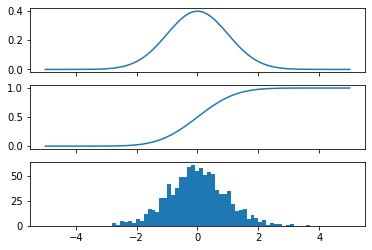

In [24]:
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50)

In [25]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [26]:
# T-test

t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(-0.4655970404066729, 0.6415547077362864)

# Fim